# EDA (Exploratory Data Analysis) 💫

+ **데이터 그 자체만으로부터 인사이트를 얻어내는 접근법**   

+ 과정에서는 시각화과정, 통계적인 수치 사용, 데이터를 담는 그릇들(Numpy, Pandas) 사용   


+ **EDA의 Process** ✨
   1. 분석의 **목적**과 **변수**(데이터의 column) 확인
      + 어떤 데이터 타입, 어떤 의미를 가지는가, 이 데이터 타입이 분석에 적절한가 
   2. **데이터 전체적**으로 살펴보기
      + 데이터의 상관관계, 결측치(NA)가 없는지 파악하기, 데이터의 사이즈가 적절한가
   3. 데이터의 **개별 속성 파악**하기
      + 각각의 feature가 무엇인지, 해당 데이터의 개별 속성 파악, 이 속성이 적절하게 매칭되어있는가 
  
  
+ 🤔 [결측치 처리](https://eda-ai-lab.tistory.com/14) & [이상치 처리](https://untitled-memo-2019.tistory.com/2?category=809528)

## 라이브러리 준비 💻

+ **탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

In [1]:
#라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 데이터 로드

titanic_df=pd.read_csv("./archive/train.csv")

## 1. 분석의 목적과 변수 확인

+ 타이타닉 호에서 생존자들은 어떤 사람들일까?
   + 살아남은 사람들은 어떤 특징을 가지고 있었는가?

In [3]:
# 상위 5개 데이터 확인해보기

titanic_df.head(5)

#NaN : Not a Number -> 메꿀건가, 이게 어떤 의미를 가지는가

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

+ 데이터의 전체적인 정보 파악하기
   + 데이터 전체 정보 얻기 : `pd.describe()`
   + 데이터간의 상관계수 확인하기 : `pd.corr()`
   + 결측치 확인하기 : `pd.isnull()`

In [5]:
# 데이터 전체 정보 얻을수 있는 함수

titanic_df.describe() # 수치형 데이터에 대한 요약만 제공해줌!!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 상관계수 확인하기

titanic_df.corr()
# Correlation is NOT Causation

# 상관성 : A up B up (경향성)
# 인과성 : A -> B (둘사이의 종속관계)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
# 결측치 확인

titanic_df.isnull().sum() #결측치를 메꿀까, 다른 데이터로 채울까 등등 생각해서 처리

#Age, Cabin, Ebarked 에서 결측치 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### I. Survived Column

In [8]:
# 생존자, 사망자 명수?

#titanic_df['Survived'].sum()
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

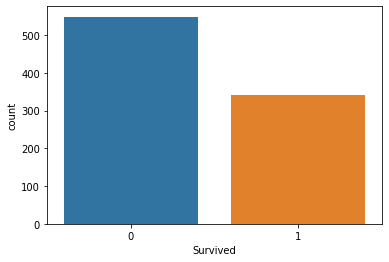

In [9]:
# 생존자수와 사망자수를 Barplot으로 그려보기 : sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

In [10]:
# 탑승등급과 생존자의 관계

# Pclass에 따른 인원 파악 (0이든 1이든 Pclass를 기준으로 카운트)
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# 생존자 인원?
# survived : 0 or 1 이니까 count를 통해 생존자수 파악
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
# 각 탑승등급에서 생존자 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


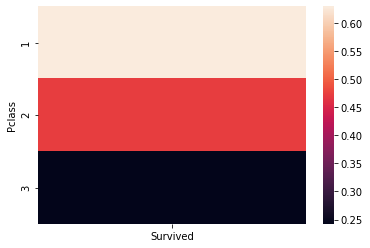

In [13]:
# 히트맵 활용-> 시각화

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

### III. Sex

In [14]:
# titanic_df[['Sex', 'Survived']]
titanic_df.groupby(['Survived','Sex']).count()
#두가지 특징(생존자, 성별)을 기준으로 그룹을 나눠 모든 column에 대해 카운트

titanic_df.groupby(['Survived','Sex'])['Survived'].count()
#특정한 column을 지정해서 (생존자)에 대해 카운트

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

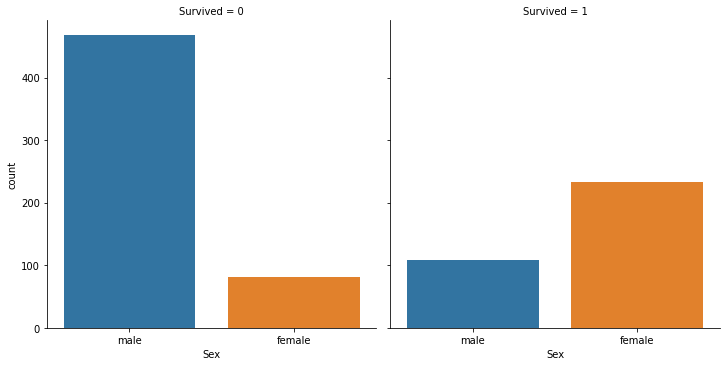

In [15]:
# sns.catplot

sns.catplot(x='Sex',col='Survived', kind='count', data=titanic_df)
plt.show()
#사망자수에서 남자가 더 많고, 생존자수에서 여자가 많은걸 확인할수있음

### IV. Age

#### Remind : 결측치 존재!

In [16]:
titanic_df.describe()['Age'] #Age column에 대해 describe 확인

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

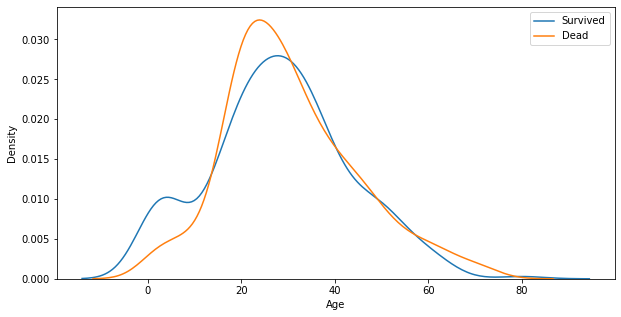

In [17]:
# Survived 1,0과 Age의 경향성 -> kdeplot

fig, ax=plt.subplots(1,1, figsize=(10,5)) #가로 몇개, 세로 몇개 그릴건지
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show() 

# 어린 아이들에 대해서 Survived가 높은 것을 확인
# 2~30대와 60~80대에서 Dead가 높은 것을 확인 

### Appendix I. Sex + Pclass vs Survied

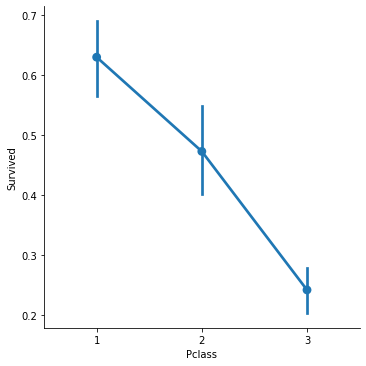

In [18]:
#복합적인 데이터에 대해 catplot 많이 활용
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show() 
#점 : 추정치, 막대 : 신뢰구간, 높은 등급일수록 survived가 높은 것을 확인

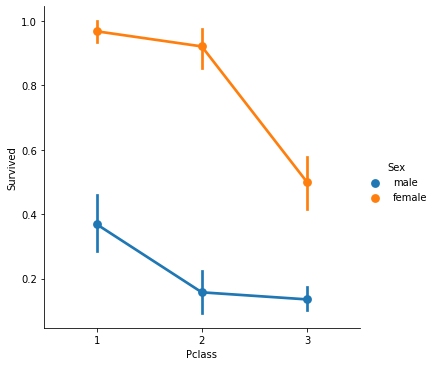

In [19]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show() 
# 각 등급에서 여성이 더 많이 생존하였음.
# 1등급,2등급일때 거의 1에 가까움 (여성)

# 단일변수로 보이지 않던 latent factor가 hue를 추가함으로써 파악가능함❗

### Appendix II. Age + Pclass

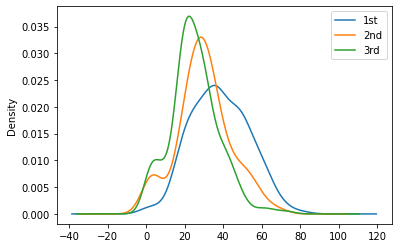

In [20]:
# Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass==1].plot(kind='kde')

titanic_df['Age'][titanic_df.Pclass==2].plot(kind='kde')

titanic_df['Age'][titanic_df.Pclass==3].plot(kind='kde')

plt.legend(['1st', '2nd', '3rd'])
plt.show()

-----------------------------------------------------------
-----------------------------------------------------------

# Mission : It's Your Turn! 🎶

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### I. Fare

In [21]:
## Fare에 대한 통계값 확인 (전체정보얻기)
titanic_df.describe()['Fare'] 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
titanic_df.corr()['Fare']
# plcass와의 상관관계 존재 (이미 위에서 상관관계 설명해주셨을때 언급해주셨음)

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.096067
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Name: Fare, dtype: float64

In [23]:
titanic_df['Fare'].isnull().sum() #결측치 존재 x

0

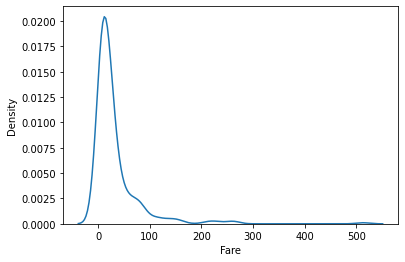

In [24]:
# Fare 데이터의 분포 시각화해서 보기

sns.kdeplot(x='Fare', data=titanic_df)
plt.show() # 너무 평균이 0에 가까운거 아닌가..?

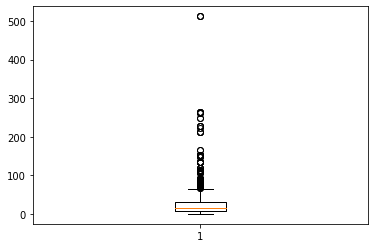

In [25]:
plt.boxplot((titanic_df['Fare']))
plt.show()

In [26]:
# fare의 최대최소값 차이가 너무 큼..
# 연속값이니까 범위로 나눠보기

bins=[0, titanic_df.describe()['Fare']['25%'], titanic_df.describe()['Fare']['50%'],titanic_df.describe()['Fare']['75%'],titanic_df.describe()['Fare']['max']]
bins

[0, 7.9104, 14.4542, 31.0, 512.3292]

+ 이산화를 위한 [qcut, cut 함수](https://kongdols-room.tistory.com/175) 존재 👍

In [27]:
titanic_df['Fare_sp']=pd.qcut(titanic_df['Fare'], 4, labels=["q1", "q2", "q3", "q4"])
titanic_df['Fare_sp']
# (-0.001, 7.91] : q1
# (7.91, 14.454] : q2
# (14.454, 31.0] : q3
# (31.0, 512.329] : q4

0      q1
1      q4
2      q2
3      q4
4      q2
       ..
886    q2
887    q3
888    q3
889    q3
890    q1
Name: Fare_sp, Length: 891, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

### 🤔 Survived 와 Fare이 어떤 경향을 가지나?

### 사분위수로 범위를 나눈 'Fare_sp'에 대해 그래프 시각화해보기

In [28]:
titanic_df.groupby(['Fare_sp', 'Survived'])['Survived'].count()

Fare_sp  Survived
q1       0           179
         1            44
q2       0           156
         1            68
q3       0           121
         1           101
q4       0            93
         1           129
Name: Survived, dtype: int64

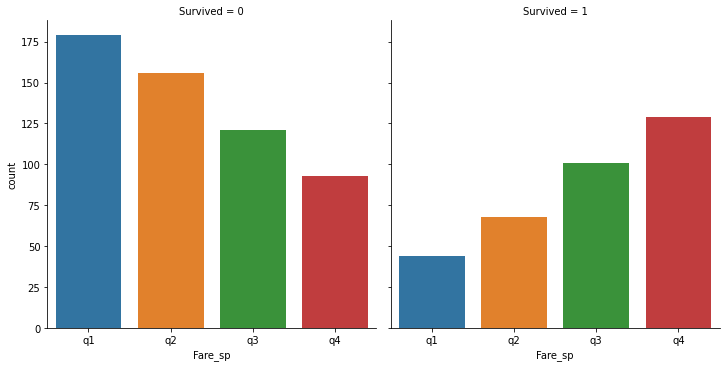

In [29]:
sns.catplot(x='Fare_sp', col='Survived', kind='count', data=titanic_df)
plt.show()

### 각 요금 범위가 높을수록 생존자가 많음을 확인할수 있음 ❗❗❗

### 🤔 Fare_sp + Sex + Survived ?

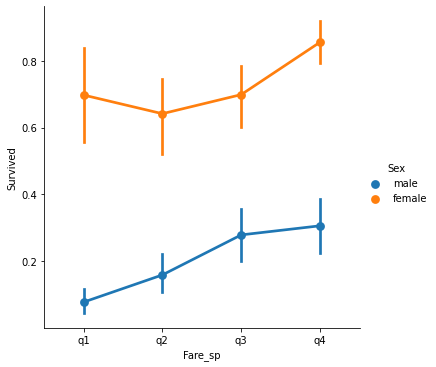

In [30]:
# catplot point 로 시각화

sns.catplot(x='Fare_sp', y='Survived', hue='Sex', data=titanic_df, kind="point")
plt.show()

# 여자가 남자보다 많이 생존 하였고, 남/여 둘다 fare가 증가할수록 생존또한 높음

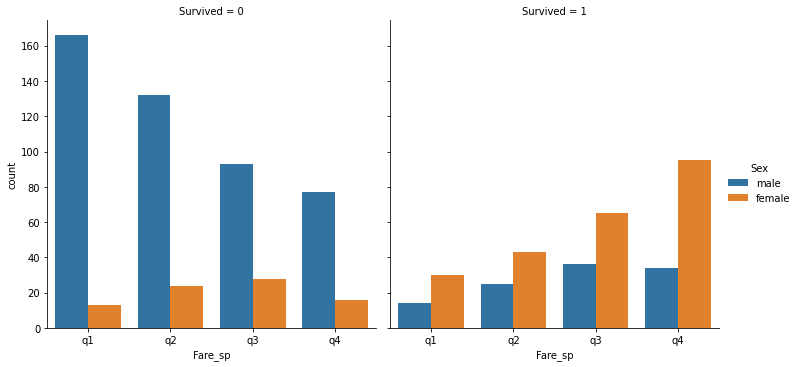

In [31]:
# catplot count로 시각화

sns.catplot(x='Fare_sp', col='Survived', hue='Sex', data=titanic_df, kind="count")
plt.show()


### 성별로 세부적으로 나눠서 보면, 
+ Survived=1일 때, 전체적으로 여자가 더 많이 생존하였으며, 요금이 증가할수록 생존한 사람들이 많음.
+ Survived=0일 때, 전체적으로 남자가 더 많이 생존하지 못했으며, 요금이 증가할수록 사망한 사람들이 적음.
+ 따라서 요금이 증가할수록 생존한 사람들이 상대적으로 많다는 것을 확인할 수있음.

### II. Parch

+ 타이타닉호에 탑승한 부모님/자녀들 수

In [33]:
## Parch에 대한 통계값 확인 (전체정보얻기)
titanic_df.describe()['Parch'] 

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [34]:
titanic_df.corr()['Parch']
#상관관계 존재 Sibsp

PassengerId   -0.001652
Survived       0.081629
Pclass         0.018443
Age           -0.189119
SibSp          0.414838
Parch          1.000000
Fare           0.216225
Name: Parch, dtype: float64

In [35]:
titanic_df['Parch'].isnull().sum() #결측치 존재 x

0

### 🤔 Parch값이 높을수록 Survived 어떤 경향을 보일까?

In [36]:
titanic_df.groupby(['Parch', 'Survived'])['Survived'].count()

#parch가 0일때, 생존하지 못한 사람들의 수가 많음
#parch가 1일때, 0에 비해 생존한 사람들이 12명 많음
#parch가 2일때, 동일
#parch가 3일때, 생존o - 생존x =1

#특이한점 !? : 4, 6일때 생존한 사람이 없네...?
# 5일때는 생존x > 생존o ..?

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

c:\users\admin\pycharmprojects\pythonproject2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


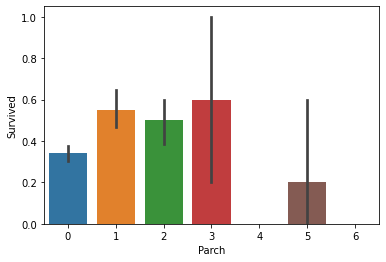

In [37]:
sns.barplot('Parch', 'Survived', data=titanic_df)
plt.show()

### parch=3일 때, 생존율이 가장 높은 것을 확인할 수 있음 ❗❗❗

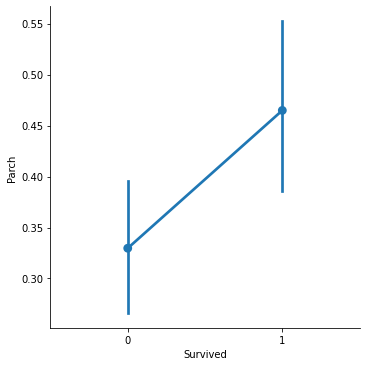

In [43]:
# catplot point을 이용해서 시각화

sns.catplot(x='Survived', y='Parch', data=titanic_df, kind="point")
plt.show()

###  Survived를 기준으로 그래프를 그려봤을 때, 상대적으로 생존자들의 Parch가 높았음을 확인 ❗❗❗

-----------------------------------------------

## 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

## 😉 해당 EDA과제는 따로 "EDA_project.ipynb"로 만들었습니다 ❗❗❗❗